In [1]:
from importlib import reload
import os, sys
%pylab inline
os.environ["GIT"]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'/camp/home/tootoos/working/tootoos/git'

In [2]:
git_path = os.environ["GIT"]
proj_dir = f"{git_path}/mctavish-2012"
sys.path.append(proj_dir+"/src")
os.chdir(proj_dir)

In [9]:
from params import sim_var
import bulbspikes as bs; reload(bs)
import neuronpy; reload(neuronpy)
import neuronpy.util as nu; reload(nu)
from neuronpy.util import spiketrain
reload(spiketrain)

<module 'neuronpy.util.spiketrain' from '/camp/home/tootoos/working/tootoos/git/mctavish-2012/src/neuronpy/util/spiketrain.py'>

In [14]:
bulb_spikes = bs.BulbSpikes(sim_time = sim_var["tstop"])
files = ["spikeout.spk", "spikeout_0_0.spk"]
pair = [0, 4]
phi = {}
ref = {}
cmp = {}
raw = {}
for file in files[::1]:
    full_file = os.path.join(proj_dir, file)
    print(full_file)
    B = bs.BulbSpikes(sim_time = sim_var["tstop"])
    B.read_file(full_file)
    spikes = B.get_mitral_spikes()
    raw[file] = B.raw
    ref[f] = spikes[pair[0]]
    cmp[f] = spikes[pair[1]]
    print(ref[f][0:10])
    phi[file] = spiketrain.coincident_spikes_correlogram(ref[f], cmp[f], window=5, normalize=True) 

/camp/home/tootoos/working/tootoos/git/mctavish-2012/spikeout.spk
Read 625 spike trains from /camp/home/tootoos/working/tootoos/git/mctavish-2012/spikeout.spk
[64.0, 264.925, 305.2, 348.075, 431.775, 459.75, 487.65, 522.125, 570.725, 611.475]
/camp/home/tootoos/working/tootoos/git/mctavish-2012/spikeout_0_0.spk
Read 505 spike trains from /camp/home/tootoos/working/tootoos/git/mctavish-2012/spikeout_0_0.spk
[64.0, 264.925, 297.3, 335.25, 402.625, 442.45, 468.425, 496.65, 531.825, 585.325]


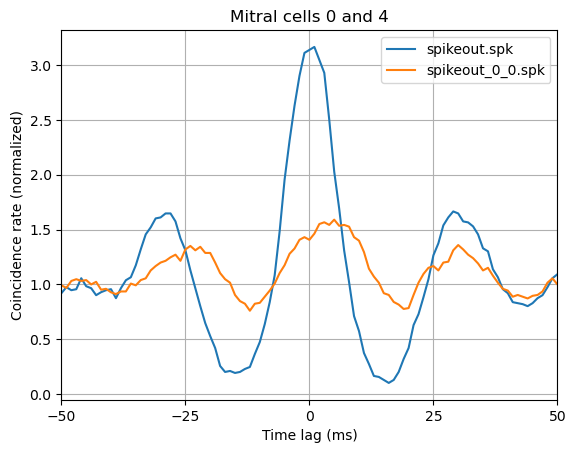

In [15]:
t = arange(len(phi[file])) * 1.0  # in ms
x = t - t[len(t)//2]
for f, phi_f in phi.items():
    plot(x, phi_f, label=f)
xlim([-50,50])
grid(True)
gca().set_xticks(arange(-50,51,25))
xlabel("Time lag (ms)")
ylabel("Coincidence rate (normalized)")
title(f"Mitral cells {pair[0]} and {pair[1]}")
legend()


In [12]:
len(spikes)

5